In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
np.random.seed(2019)
data = np.random.randn(100,2)
data

array([[-0.21767896,  0.82145535],
       [ 1.48127781,  1.33186404],
       [-0.36186537,  0.68560883],
       [ 0.57376143,  0.28772767],
       [-0.23563426,  0.95349024],
       [-1.6896253 , -0.34494271],
       [ 0.0169049 , -0.51498352],
       [ 0.24450929, -0.18931261],
       [ 2.67217242,  0.46480249],
       [ 0.84593044, -0.50354158],
       [-0.96333553,  0.06496863],
       [-3.20504023,  1.05496943],
       [ 0.80727669,  0.47414055],
       [ 0.41092825,  0.48668927],
       [-0.53552971, -0.83890794],
       [-0.81237482, -0.45079294],
       [ 1.07080136,  0.21742115],
       [-1.17585859, -0.92611679],
       [-0.99394766,  0.58680631],
       [ 1.06381324,  0.23774086],
       [-0.77505656, -0.97910395],
       [-1.54936294, -1.20682824],
       [ 0.44500823, -0.17308621],
       [ 1.48894719, -0.79252049],
       [ 1.8389971 , -0.43936212],
       [ 1.16000317, -0.57709345],
       [-1.0310444 , -0.83888545],
       [ 0.31693406,  0.35325398],
       [ 1.51572304,

In [12]:
data[:50,0]=data[:50,0]*4+10
data[:50,1]=data[50:,1]*4+5

data[50:,0]=data[50:,0]*4+18
data[50:,1]=data[50:,1]*4+13
data

array([[ 9.12928415,  6.27893749],
       [15.92511124,  6.44811669],
       [ 8.55253851,  2.57539383],
       [12.29504571, 11.51477725],
       [ 9.05746296,  5.59599329],
       [ 3.24149879,  0.80444409],
       [10.06761959,  8.49684281],
       [10.97803717,  6.18968717],
       [20.68868967, 15.38226096],
       [13.38372178,  3.6038702 ],
       [ 6.14665788,  4.73129194],
       [-2.82016093,  8.99412452],
       [13.22910678, -3.56409745],
       [11.64371299,  1.20210434],
       [ 7.85788117,  5.17995217],
       [ 6.75050072,  9.57599737],
       [14.28320542, 11.80905335],
       [ 5.29656562,  6.4939178 ],
       [ 6.02420936,  3.04649866],
       [14.25525297,  0.17397305],
       [ 6.89977375, -0.31556134],
       [ 3.80254826,  8.71023068],
       [11.78003293,  6.5357232 ],
       [15.95578876,  6.76798479],
       [17.3559884 ,  6.0461312 ],
       [14.64001267, 11.49524542],
       [ 5.87582241, -0.49660653],
       [11.26773625, 12.29805514],
       [16.06289218,

In [13]:
y=np.append(np.ones(50),np.zeros(50))
y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

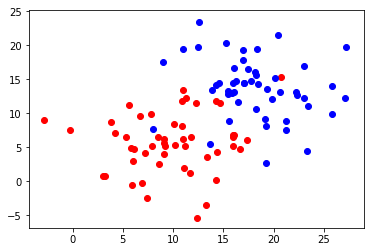

In [15]:
plt.scatter(data[:50,0], data[:50,1],color="red",marker='o',label='class1')
plt.scatter(data[50:,0], data[50:,1],color='blue',marker='o',label='class2')

In [16]:
X_train, X_test, y_train , y_test = train_test_split( data , y , test_size=0.25,stratify=y)

In [17]:
def sigmoid(scores):
    return 1 / (1 + np.exp(-scores))

In [18]:
def cost_function(features, target, weights):
    scores = np.dot(features,weight)
    cf = np.sum( -target*scores +0 )
    return cf

In [19]:
def logistic_regression(features, target, num_steps, learning_rate,add_intercept="False"):
    if add_intercept:
        intercept = np.ones((features.shape[0],1))
        features = np.hstack((intercept, features))
    ypred=[]
    weights=np.zeros(features.shape[1])
    
    for i in range(num_steps):
        scores = np.dot(features,weights)
        predictions = sigmoid(scores)
        gradient = np.dot(features.T,predictions-target)
        weights =weights- ((learning_rate/features.shape[0]) * gradient)
        
    score_final = np.dot(features,weights)
    score_final_sigmoid=sigmoid(score_final)
    ypred=np.round(score_final_sigmoid)
    
    return ypred

In [21]:
i=logistic_regression(X_test,y_test,1000,0.12,add_intercept="True")
print(np.sum((i-y_test)==0)/len(i))

0.72
